<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C00_Img00_logo.png?raw=true" width="350" />
</p>
<h1 align="center">ST0256 - Análisis Numérico</h1>
<h1 align="center">Capítulo 4: Interpolación Numérica</h1>
<h1 align="center">2021/01</h1>
<h1 align="center">MEDELLÍN - COLOMBIA </h1>

<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.(c) Carlos Alberto Alvarez Henao</td>
</table>

*** 

***Docente:*** Carlos Alberto Álvarez Henao, I.C. D.Sc.

***e-mail:*** calvar52@eafit.edu.co

***skype:*** carlos.alberto.alvarez.henao

***Herramienta:*** [Jupyter notebook](http://jupyter.org/)

***Kernel:*** Python 3.8


***

<a id='TOC'></a>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span><ul class="toc-item"><li><span><a href="#Propósitos-de-la-interpolación" data-toc-modified-id="Propósitos-de-la-interpolación-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Propósitos de la interpolación</a></span></li><li><span><a href="#Diferencias-entre-Interpolación,-Aproximación-y-Ajuste-de-curvas" data-toc-modified-id="Diferencias-entre-Interpolación,-Aproximación-y-Ajuste-de-curvas-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Diferencias entre Interpolación, Aproximación y Ajuste de curvas</a></span></li><li><span><a href="#Interpolación-vs-Aproximacion" data-toc-modified-id="Interpolación-vs-Aproximacion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interpolación vs Aproximacion</a></span></li><li><span><a href="#Interpolación-vs-Ajuste-de-curvas" data-toc-modified-id="Interpolación-vs-Ajuste-de-curvas-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Interpolación vs Ajuste de curvas</a></span></li><li><span><a href="#Elección-de-la-función-de-interpolación" data-toc-modified-id="Elección-de-la-función-de-interpolación-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Elección de la función de interpolación</a></span></li></ul></li><li><span><a href="#Interpolación-Polinomial" data-toc-modified-id="Interpolación-Polinomial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interpolación Polinomial</a></span><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Interpolación-Lineal" data-toc-modified-id="Interpolación-Lineal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Interpolación Lineal</a></span><ul class="toc-item"><li><span><a href="#Ejemplo-interpolación-lineal" data-toc-modified-id="Ejemplo-interpolación-lineal-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Ejemplo interpolación lineal</a></span></li><li><span><a href="#Visualización-computacional" data-toc-modified-id="Visualización-computacional-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Visualización computacional</a></span></li><li><span><a href="#Mejoras-al-esquema-de-interpolación-lineal" data-toc-modified-id="Mejoras-al-esquema-de-interpolación-lineal-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Mejoras al esquema de interpolación lineal</a></span></li></ul></li><li><span><a href="#Interpolación-cuadrática" data-toc-modified-id="Interpolación-cuadrática-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Interpolación cuadrática</a></span><ul class="toc-item"><li><span><a href="#Ejemplo-interpolación-cuadrática" data-toc-modified-id="Ejemplo-interpolación-cuadrática-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Ejemplo interpolación cuadrática</a></span></li><li><span><a href="#Implementación-computacional" data-toc-modified-id="Implementación-computacional-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Implementación computacional</a></span></li></ul></li><li><span><a href="#Polinomio-de-diferencias-divididas-de-Newton" data-toc-modified-id="Polinomio-de-diferencias-divididas-de-Newton-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Polinomio de diferencias divididas de Newton</a></span><ul class="toc-item"><li><span><a href="#Implementación-computacional" data-toc-modified-id="Implementación-computacional-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Implementación computacional</a></span></li></ul></li><li><span><a href="#Análisis-de-Error-para-la-interpolación-polinomial-tipo-Newton" data-toc-modified-id="Análisis-de-Error-para-la-interpolación-polinomial-tipo-Newton-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Análisis de Error para la interpolación polinomial tipo Newton</a></span></li><li><span><a href="#Polinomios-de-Interpolación-de-Lagrange" data-toc-modified-id="Polinomios-de-Interpolación-de-Lagrange-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Polinomios de Interpolación de Lagrange</a></span><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Polinomio-de-Interpolación-de-Lagrange-de-primer-grado" data-toc-modified-id="Polinomio-de-Interpolación-de-Lagrange-de-primer-grado-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Polinomio de Interpolación de Lagrange de primer grado</a></span></li><li><span><a href="#Polinomio-de-Interpolación-de-Lagrange-de-segundo-grado" data-toc-modified-id="Polinomio-de-Interpolación-de-Lagrange-de-segundo-grado-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Polinomio de Interpolación de Lagrange de segundo grado</a></span></li><li><span><a href="#Ejemplo-polinomio-de-interpolación-de-Lagrange" data-toc-modified-id="Ejemplo-polinomio-de-interpolación-de-Lagrange-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Ejemplo polinomio de interpolación de Lagrange</a></span></li><li><span><a href="#Implementación-computacional" data-toc-modified-id="Implementación-computacional-2.6.5"><span class="toc-item-num">2.6.5&nbsp;&nbsp;</span>Implementación computacional</a></span></li><li><span><a href="#Funciones-de-base" data-toc-modified-id="Funciones-de-base-2.6.6"><span class="toc-item-num">2.6.6&nbsp;&nbsp;</span>Funciones de base</a></span></li><li><span><a href="#Dificultades-de-los-polinomios-de-Lagrange" data-toc-modified-id="Dificultades-de-los-polinomios-de-Lagrange-2.6.7"><span class="toc-item-num">2.6.7&nbsp;&nbsp;</span>Dificultades de los polinomios de Lagrange</a></span></li></ul></li></ul></li><li><span><a href="#Interpolación-mediante-trazadores" data-toc-modified-id="Interpolación-mediante-trazadores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpolación mediante trazadores</a></span><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Trazadores-lineales" data-toc-modified-id="Trazadores-lineales-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Trazadores lineales</a></span></li><li><span><a href="#Trazadores-cuadráticos" data-toc-modified-id="Trazadores-cuadráticos-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Trazadores cuadráticos</a></span></li><li><span><a href="#Trazadores-cúbicos" data-toc-modified-id="Trazadores-cúbicos-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Trazadores cúbicos</a></span><ul class="toc-item"><li><span><a href="#Alternativa-I:" data-toc-modified-id="Alternativa-I:-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Alternativa I:</a></span></li><li><span><a href="#Alternativa-II:" data-toc-modified-id="Alternativa-II:-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Alternativa II:</a></span></li><li><span><a href="#Alternativa-III:" data-toc-modified-id="Alternativa-III:-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Alternativa III:</a></span></li><li><span><a href="#Alternativa-IV:" data-toc-modified-id="Alternativa-IV:-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Alternativa IV:</a></span></li></ul></li><li><span><a href="#Ejemplo-aplicación" data-toc-modified-id="Ejemplo-aplicación-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Ejemplo aplicación</a></span><ul class="toc-item"><li><span><a href="#Trazadores-cuadráticos" data-toc-modified-id="Trazadores-cuadráticos-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Trazadores cuadráticos</a></span></li><li><span><a href="#Trazadores-cúbicos" data-toc-modified-id="Trazadores-cúbicos-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Trazadores cúbicos</a></span></li></ul></li></ul></li></ul></div>

## Introducción

La información (datos) resultante de la medición de un evento ya sea natural o social viene dada en forma discreta o tabular, es decir, se expresa como un conjunto de pares ordenados $(x_i,y_i)$. Por ejemplo, los datos obtenidos de los censos poblacionales realizados en Colombia desde 1985 según el [DANE](https://www.dane.gov.co/) son:

|Año|Población*|
|:----:|:----:|
|1985|30802|
|1990|34130|
|1995|37472|
|2000|40296|
|2005|42889|
|2010|45510|
|2015|48203|

(\* en miles de habitantes)

***Nota:*** Ejemplo tomado de las notas de clase del curso Simulación Computacional de la Universidad EAFIT y es autoría  del profesor Nicolás Guarín.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit


In [ ]:
start = 1985.
stop = 2015.
step = int((stop - start) / 5) + 1

x = np.linspace(start, stop, step)
y = [30802, 34130, 37472, 40296, 42889, 45510, 48203]

plt.plot(x,y, 'o')
plt.grid(True)

Si quisieramos responder a la pregunta: ¿Cuál era la población de Colombia en el 2012? 

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o')
ax.vlines(x=2012, ymin=30000.0, ymax=48203.0, color='r')
ax.hlines(y=46000.0, xmin=1985.0, xmax=2012.0, color='y')
ax.hlines(y=47000.0, xmin=1985.0, xmax=2012.0, color='b')
ax.hlines(y=48000.0, xmin=1985.0, xmax=2012.0, color='g')
plt.grid(True)
plt.show()

¿cuál de los valores mostrados arriba es el más correcto? Podemos plantear varias ideas para determinar dicho valor:

- Considerando que la función es constante entre los valores

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o')

ax.hlines(y=y[0], xmin=x[0], xmax=x[0] + 2, color='b')
ax.vlines(x=x[0] + 2, ymin=y[0], ymax=y[1], color='b')

for i in range(1, len(x)-1):
    ax.hlines(y=y[i], xmin=x[i]-3, xmax= x[i] + 2, color='b')
    ax.vlines(x=x[i]+2, ymin=y[i], ymax=y[i+1], color='b')

ax.hlines(y=y[-1], xmin=x[-1]-3, xmax=x[-1]+2, color='b')

ax.vlines(x = 2012, ymin = 30000.0, ymax = y[-1], color = 'r')
ax.hlines(y = y[-1], xmin = 1985.0, xmax = 2012.0, color = 'r')

plt.grid(True)
plt.show()

- Asumiendo que la función es lineal entre valores 

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o--')
ax.vlines(x = 2012, ymin = 30000.0, ymax = 46700, color = 'r')
ax.hlines(y = 46700, xmin = 1985.0, xmax = 2012.0, color = 'r')

plt.grid(True)
plt.show()

- Determinando un polinomio que pase por cada uno de los puntos.

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o')

t = np.linspace(0, 1, len(x)) # parameter t to parametrize x and y
pxLagrange = scipy.interpolate.lagrange(t, x) # X(T)
pyLagrange = scipy.interpolate.lagrange(t, y) # Y(T)
n = 100
ts = np.linspace(t[0],t[-1],n)
xLagrange = pxLagrange(ts) # lagrange x coordinates
yLagrange = pyLagrange(ts) # lagrange y coordinates
ax.plot(xLagrange, yLagrange,'b-')

ax.vlines(x=2012, ymin=30000.0, ymax=46700, color='r')
ax.hlines(y=46700, xmin=1985.0, xmax=2012.0, color='r')

ax.grid(True)
plt.show()

- ajustando la curva que mejor se aproxime a cada uno de los datos. En este ejemplo haremos un ajuste lineal, pero no es la única forma de hacerlo.

In [ ]:
# define the true objective function
def objective(x, a, b):
    return a * x + b
 
# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

fig, ax = plt.subplots()

# plot input vs output
ax.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

# create a line plot for the mapping function
ax.plot(x_line, y_line, '--', color='b')

yfit = a * 2012 + b

ax.vlines(x=2012, ymin=30000.0, ymax=yfit, color='r')
ax.hlines(y=yfit, xmin=1985.0, xmax=2012.0, color='r')

plt.grid(True)
plt.show()

En este curso nos centraremos en los esquemas de interpolación, por lo que los esquemas de ajuste no se tratarán.

[Volver a la Tabla de Contenido](#TOC)

### Propósitos de la interpolación

Los problemas de interpolación surgen de muchas fuentes diferentes y pueden tener muchos propósitos diferentes. Algunos de estos incluyen:

- Trazar una curva suave a través de puntos de datos discretos


- Evaluación rápida y sencilla de una función matemática


- Reemplazar una función difícil por una fácil


- Diferenciar o integrar datos tabulares

[Volver a la Tabla de Contenido](#TOC)

### Diferencias entre Interpolación, Aproximación y Ajuste de curvas

Las técnicas para resolver el problema de determinar un valor intermedio entre dos valores conocidos se pueden enmarcar en:

- [Interpolación](https://en.wikipedia.org/wiki/Interpolation)


- [Aproximación](https://en.wikipedia.org/wiki/Approximation_theory)


- [Ajuste de curvas](https://en.wikipedia.org/wiki/Curve_fitting)

A continuación vamos a describir brevemente las diferencias entre ellas.

[Volver a la Tabla de Contenido](#TOC)

### Interpolación vs Aproximacion

En interpolación, se ajustan todos los puntos de datos de forma exacta mientras que la aproximación, como su nombre indica, solo se aproxima.

Cuando se trata de la idoneidad, la interpolación es apropiada para suavizar esos datos ruidosos y no es apropiada cuando los puntos de datos están sujetos a errores experimentales u otras fuentes de error significativo. Tener un gran conjunto de puntos de datos también puede sobrecargar la interpolación. Por otro lado, la aproximación es principalmente apropiada para el diseño de rutinas de biblioteca para calcular funciones especiales. Esto se debe a la naturaleza de estas funciones: se considera que los valores exactos no son esenciales y, hasta cierto punto, ineficaces cuando los valores aproximados funcionan.

[Volver a la Tabla de Contenido](#TOC)

### Interpolación vs Ajuste de curvas

En el ajuste de curvas, no ajustamos todos nuestros puntos de datos. Por eso tenemos el concepto de residuos. En la interpolación, se obliga a la función a ajustarse a todos los puntos de datos. Ver la referencia del [Cuarteto de ascombe](https://es.wikipedia.org/wiki/Cuarteto_de_Anscombe) como un contra ejemplo de los inconvenientes en los ajustes de curvas.

Ahora que sabemos de qué categoría estamos hablando, reduzcamos a las familias de funciones utilizadas para la interpolación.

[Volver a la Tabla de Contenido](#TOC)

### Elección de la función de interpolación

Es importante darse cuenta de que existe cierta arbitrariedad en la mayoría de los problemas de interpolación. Hay arbitrariamente muchas funciones que interpolan un conjunto dado de datos. Simplemente requiriendo que alguna función matemática se ajuste a los puntos de datos deje exactamente abiertos tales
preguntas como:

- ¿Qué forma debe tener la función? Puede haber consideraciones matemáticas o físicas relevantes que sugieran una forma particular de interpolante.


- ¿Cómo debería comportarse la función entre puntos de datos?


- ¿Debería la función heredar propiedades de los datos, como monotonicidad, convexidad o periodicidad?


- Si se grafican la función y los datos, ¿los resultados deberían ser agradables a la vista?


- ¿Estamos interesados principalmente en los valores de los parámetros que definen la función de interpolación, o simplemente en evaluar la función en varios puntos para graficar u otros propósitos?


La elección de la función de interpolación depende de las respuestas a estas preguntas, así como de los datos que se deben ajustar y generalmente se basa en:

- Qué tan fácil es trabajar con la función (determinar sus parámetros a partir de los datos, evaluar la función en un punto dado, diferenciar o integrar la función, etc.)


- Qué tan bien las propiedades de la función coinciden con las propiedades de los datos a ser t (suavidad, monotonicidad, convexidad, periodicidad, etc.)


Algunas familias de funciones que se utilizan comúnmente para la interpolación incluyen:


- [Polinomios](https://en.wikipedia.org/wiki/Polynomial_interpolation)


- [Interpolación a trazos](https://en.wikipedia.org/wiki/Spline_interpolation)


- Funciones trigonométricas


- Exponenciales


- Funciones racionales


En este capítulo nos centraremos en la interpolación por polinomios e interpolación a trazos.


[Volver a la Tabla de Contenido](#TOC)

## Interpolación Polinomial

### Introducción

La interpolación polinomial es el tipo de interpolación más simple y común. Una de sus características es que siempre hay un polinomio único de grado como máximo $n-1$ que pasa por $n$ puntos de datos.
Hay muchas formas de calcular o representar un polinomio, pero se reducen a la misma función matemática. Algunos de los métodos son la base monomial, la base de [Lagrange](https://en.wikipedia.org/wiki/Lagrange_polynomial) y la base de [Newton](https://en.wikipedia.org/wiki/Newton_polynomial). Como puede observar, reciben el nombre de su base.

***Inconvenientes:***

- ***Polinomio de alto grado:*** una elección adecuada de funciones de base y puntos de interpolación puede mitigar algunas de las dificultades asociadas con polinomio de alto grado.


- ***Sobreajuste ([overfitting](https://en.wikipedia.org/wiki/Overfitting)):*** ajuste de un solo polinomio a una gran cantidad de puntos de datos, lo que probablemente produciría un comportamiento de oscilación insatisfactorio en el interpolante.

La fórmula general de un polinomio de $n$-ésimo orden es:

\begin{equation*}
f_n(x) = a_0 + a_1x + a_2x^2 +…+  a_nx^n
\label{eq:Ec4_1} \tag{4.1}
\end{equation*}

El polinomio de interpolación dado por la ecuación $\eqref{eq:Ec4_1}$ consiste en determinar el único polinomio de n-ésimo orden que se ajusta a los $n+1$ puntos dados. Este polinomio proporciona una fórmula para calcular los valores intermedios.

[Volver a la Tabla de Contenido](#TOC)

### Interpolación Lineal

El método más simple de interpolación es conectar dos puntos mediante una línea recta.

<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C04_Img01_InterpolLineal.PNG?raw=true" width="250" />
</p>

<div style="text-align: right"> Fuente: <a href="http://artemisa.unicauca.edu.co/~cardila/Chapra.pdf">Chapra, S., Canale, R. Métodos Numéricos para ingenieros, 5a Ed. Mc. Graw Hill. 2007</a> </div>

De la figura se tiene:

\begin{equation*}
\frac{f_1(x)-f(x_0)}{x-x_0}=\frac{f(x_1)-f(x_0)}{x_1-x_0}
\label{eq:Ec4_2} \tag{4.2}
\end{equation*}

reordenando,

\begin{equation*}
f_1(x)=f(x_0)+\frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_0)
\label{eq:Ec4_3} \tag{4.3}
\end{equation*}


[Volver a la Tabla de Contenido](#TOC)

#### Ejemplo interpolación lineal

- Estime el valor de $Ln(2)$ empleando la interpolación lineal, entre $x_0=0$ y $x_1=6$

Evaluando el valor del logaritmo en cada uno de los dos puntos, $Ln(1)=0$ y $Ln(6)=1.791759$

$$f_1(2)=0+\frac{1.791759-0}{6-1}(2-1)=0.3583519$$

El valor exacto es $Ln(2)=0.693147$, que representa un error relativo porcentual de

$$Er(\%)=\frac{|0.693147-0.3583519|}{0.693147}=48.3\%$$

Si se disminuye el valor del intervalo a evaluar, por ejemplo en $x_1=4$, se llega a 

$$f_1(2)=0+\frac{1.386294-0}{4-1}(2-1)=0.462098$$

obteniendo un error relativo porcentual del $33.3\%$.


[Volver a la Tabla de Contenido](#TOC)

#### Visualización computacional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

fig, ax = plt.subplots()

x = np.linspace(1, 6, n)
y = np.log(x)

x1 = [x[0], x[-1]]
y1 = [np.log(x[0]), np.log(x[-1])]

x2 = [x[0], 4]
y2 = [np.log(x[0]), np.log(4)]

ax.plot(x,y, '-', x1, y1, 'o-', x2,y2, 'o-')
ax.vlines(x = 2, ymin = 0.0, ymax = np.log(2), color = 'r', linestyles='dashed')

plt.grid(True)


El error en la interpolación lineal resulta de aproximar una curva con una línea recta.


[Volver a la Tabla de Contenido](#TOC)

#### Mejoras al esquema de interpolación lineal

- Disminuir el tamaño del intervalo.


- Introducir alguna curvatura en la línea que conecta los puntos.

[Volver a la Tabla de Contenido](#TOC)

<a id='DDN'></a>
### Interpolación cuadrática

Si tres (3) puntos de los datos están disponibles, esto puede realizarse con un polinomio de segundo grado (parábola).

<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C04_Img02_InterpolCuadratica.PNG?raw=true" width="350" />
</p>

<div style="text-align: right"> Fuente: <a href="http://artemisa.unicauca.edu.co/~cardila/Chapra.pdf">Chapra, S., Canale, R. Métodos Numéricos para ingenieros, 5a Ed. Mc. Graw Hill. 2007</a> </div>


La forma general de una ecuación cuadrática puede expresarse de la siguiente forma:

\begin{equation*}
f_2(x) = b_0 + b_1(x–x_0) + b_2(x–x_0)(x–x_1)
\label{eq:Ec4_4} \tag{4.4}
\end{equation*}

Debemos determinar los valores de los coeficientes $b_i$.

- Para $b_0$, en la ecuación $\eqref{eq:Ec4_4}$, con $x = x_0$:

\begin{equation*}
b_0 = f(x_0)
\label{eq:Ec4_5} \tag{4.5}
\end{equation*}

- Para $b_1$, sustituyendo la ecuación $\eqref{eq:Ec4_5}$ en la la ecuación $\eqref{eq:Ec4_4}$, y evaluando en $x = x_1$:

\begin{equation*}
b_1 = \frac{f(x_1)-f(x_0)}{(x_1 - x_0)}
\label{eq:Ec4_6} \tag{4.6}
\end{equation*}

- Para $b_2$, las ecuaciones $\eqref{eq:Ec4_5}$ y $\eqref{eq:Ec4_6}$ pueden sustituirse en la ecuación $\eqref{eq:Ec4_4}$, evaluada en $x_2$

\begin{equation*}
b_2=\frac{\frac{f(x_2)-f(x_1)}{(x_2-x_1)}-\frac{f(x_1)-f(x_0)}{(x_1-x_0)}}{(x_2 - x_0)}
\label{eq:Ec4_7} \tag{4.7}
\end{equation*}


[Volver a la Tabla de Contenido](#TOC)

#### Ejemplo interpolación cuadrática

Continuando con el ejemplo anterior, se van a considerar los siguientes puntos:

$$x_0=1 \hspace{1cm} f(x_0)=0.000000$$
$$x_1=4 \hspace{1cm} f(x_1)=1.386294$$
$$x_2=6 \hspace{1cm} f(x_2)=1.791759$$

De las ecuaciones anteriores, 

$$b_0=0$$

$$b_1=\frac{1.386294-0}{4-1}=0.4620981$$

$$b_2=\frac{\frac{1.791759-1.386294}{6-4}-0.4620981}{6-1}=-0.0518731$$

Sustituyendo estos valores en la ecuación cuadrática inicial, se llega a:

$$f_2(x)=0+0.4620981(x-1)-0.0518731(x-1)(x-4)$$

y evaluando en $x=2$, se llega a

$$f_2(2)=0.565844$$

que representa un error relativo porcentual del $18.4\%$

[Volver a la Tabla de Contenido](#TOC)

#### Implementación computacional

In [ ]:
def difdiv2o(x, y, xm):
    b0 = y[0]
    b1 = (y[1] - b0) / (x[1] - x[0])
    b2 = ((y[2] - y[1]) / (x[2] - x[1]) - b1) / (x[2] - x[0])

    return b0 + b1 * (xm - x[0]) + b2 * (xm - x[0]) * (xm - x[1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

fig, ax = plt.subplots()

x = np.linspace(1, 6, n)
y = np.log(x)

x1 = [x[0], 4, x[-1]]
y1 = [np.log(x[0]), np.log(x1[1]), np.log(x[-1])]
ym = difdiv2o(x1,y1,2)

x1.insert(1, 2)
y1.insert(1,ym)

ax.plot(x, y, '-', x1, y1, 'o-')
ax.vlines(x = 2, ymin = 0.0, ymax = np.log(2), color = 'r', linestyles='dashed')

plt.grid(True)

### Polinomio de diferencias divididas de Newton

Lo anterior puede ser generalizado para ajustar un polinomio de $n$-ésimo orden a $n+1$ datos:

<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C04_Img03a_DivDifNewton?raw=true" width="500" />
</p>

<div style="text-align: right"> Fuente: <a href="https://medium.com/">medium.com</a> </div>

\begin{equation*}
f_n(x) = b_0+b_1(x–x_0)+\ldots+b_n(x–x_0)(x–x_1)\ldots(x – x_{n-1})
\label{eq:Ec4_8} \tag{4.8}
\end{equation*}

De igual manera que para las interpolaciones lineal y cuadrática, se llega a:
	
\begin{equation*}
f_n(x)=f(x_0)+(x–x_0)f[x_1,x_0]+(x–x_0)(x–x_1)f[x_2,x-,x_0]+\ldots+(x–x_0)(x–x_1)\ldots(x–x_{n-1})f[x_n, x_{n-1},\ldots,x_2,x_1,x_0]
\label{eq:Ec4_9} \tag{4.9}
\end{equation*}

Conocido como *Polinomio de interpolación por [diferencias divididas de Newton](https://en.wikipedia.org/wiki/Divided_differences)*. Las evaluaciones de las funciones puestas entre paréntesis son diferencias divididas finitas.
 
- ***Primera diferencia dividida:***

\begin{equation*}
f[x_i, x_j]=\frac{f(x_i)-f(x_j)}{(x_i-x_j)}
\label{eq:Ec4_10} \tag{4.10}
\end{equation*}

- ***Segunda diferencia dividida:*** representa la diferencia de las dos primeras diferencias divididas

\begin{equation*}
f[x_i, x_j,x_k]=\frac{f[x_i,x_j]-f[x_j,x_k]}{(x_i-x_k)}
\label{eq:Ec4_11} \tag{4.11}
\end{equation*}

$$\vdots$$

- ***$n$-ésima diferencia dividida:*** representa la diferencia de las dos primeras diferencias divididas
\begin{equation*}
f[x_n, x_{n-1},\ldots, x_1,x_0]=\frac{f[x_n,x_{n-1},\ldots,x_1]-f[x_{n-1},x_{n-2},\ldots,x_0]}{(x_n-x_0)}
\label{eq:Ec4_12} \tag{4.12}
\end{equation*}

Este proceso recursivo lo podemos visualizar de la siguiente manera:

<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C04_Img03_DivDifNewton.PNG?raw=true" width="500" />
</p>

<div style="text-align: right"> Fuente: <a href="https://upload.wikimedia.org/wikipedia/commons/0/00/Newton_method.png">Wikimedia.org</a> </div>


[Volver a la Tabla de Contenido](#TOC)

#### Implementación computacional

En la página 513 del libro de Chapra y Canale, Figura 18.7, se tiene un algoritmo en Fortran para la implementación del código de Diferencias Divididas tipo Newton. Se invita al estudiante a que lo estudie y codifique en el lenguaje de preferencia.

In [ ]:
# Escriba aquí su código

[Volver a la Tabla de Contenido](#TOC)

### Análisis de Error para la interpolación polinomial tipo Newton

La ecuación $\eqref{eq:Ec4_9}$ es similar a la *serie de expansión de Taylor*. Se agregan términos en forma secuencial para capturar el comportamiento de alto orden de la función a analizar. Estos términos son diferencias divididas finitas y, así, representan aproximaciones de derivadas de orden mayor.

El error de truncamiento se expresa entonces como:

\begin{equation*}
R_n=\frac{f^{(n+1)}(\xi)}{(n+1)!} \left ( x_{i+1}-x_i\right )^{n+1}
\label{eq:Ec4_13} \tag{4.13}
\end{equation*}

Para una interpolación de n-ésimo orden, una relación análoga para el error es

<a id='Ec4_14'></a>
\begin{equation*}
R_n=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)(x-x_1) \ldots (x-x_n)
\label{eq:Ec4_14} \tag{4.14}
\end{equation*}

Observe que en la ecuación [(4.14)](#Ec4_14), la función debe conocerse. Para resolver esta situación, una formulación alternativa es el uso de la diferencia dividida para aproximar la derivada $(n+1)$–ésima y que no requiere el conocimiento previo de la función.

<a id='Ec4_15'></a>
\begin{equation*}
R_n=f_n[x_n,x_{n-1},x_{n-2},\ldots,x_2,x_1,x_0](x-x_0)(x-x_1) \ldots (x-x_n)
\label{eq:Ec4_15} \tag{4.15}
\end{equation*}

Debido a que la ecuación [(4.15)](#Ec4_15) contiene el término $f_n(x)$ no puede resolverse para estimar el error, pero, si se dispone de un dato adicional, la ecuación [(4.15)](#Ec4_15) puede usarse:

\begin{equation*}
R_n=f_n[x_{n+1}, x_n,x_{n-1},x_{n-2},\ldots,x_2,x_1,x_0](x-x_0)(x-x_1) \ldots (x-x_n)
\label{eq:Ec4_16} \tag{4.16}
\end{equation*}


[Volver a la Tabla de Contenido](#TOC)

### Polinomios de Interpolación de Lagrange

#### Introducción

El [polinomio de interpolación de Lagrange](https://en.wikipedia.org/wiki/Lagrange_polynomial) evita el cálculo de las diferencias divididas en el esquema de Newton. De una forma general, se representa como la [combinación lineal](https://en.wikipedia.org/wiki/Linear_combination):

\begin{equation*}
f_n(x)=\sum \limits_{i=0}^n L_i(x)f(x_i)
\label{eq:Ec4_17} \tag{4.17}
\end{equation*}

donde $L_i$ son las bases polinómicas de *[Lagrange](https://es.wikipedia.org/wiki/Joseph-Louis_Lagrange)* dadas por: 

\begin{equation*}
L_i(x)=\prod_{\substack{j=0\\ j \ne i}}^n \frac{x-x_j}{x_i-x_j}
\label{eq:Ec4_18} \tag{4.18}
\end{equation*}

de $\eqref{eq:Ec4_18}$ se observa que todas las funciones $L_i$ son polinomios de grado $n$ que tienen la propiedad

\begin{equation*}
L_i(x_j)=\delta_{ij}, \quad \delta_{ij} = \left \{
\begin{aligned}
1, \quad i=j,\\
0, \quad i \ne j
\end{aligned}
\right.
\label{eq:Ec4_19} \tag{4.19}
\end{equation*}

donde $\delta_{is}$ es el [delta de Kronecker](https://en.wikipedia.org/wiki/Kronecker_delta).


[Volver a la Tabla de Contenido](#TOC)

#### Polinomio de Interpolación de Lagrange de primer grado

Tomando $n=1$ (lineal), se tiene

\begin{equation*}
f_1(x)=\frac{(x-x_1)}{(x_0-x_1)}f(x_0)+\frac{(x-x_0)}{(x_1-x_0)}f(x_1)
\label{eq:Ec4_19a} \tag{4.19a}
\end{equation*}

[Volver a la Tabla de Contenido](#TOC) 

#### Polinomio de Interpolación de Lagrange de segundo grado

Tomando $n=2$ (cuadrático), se tiene

\begin{equation*}
f_2(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)
\label{eq:Ec4_20} \tag{4.20}
\end{equation*}

[Volver a la Tabla de Contenido](#TOC) 

#### Ejemplo polinomio de interpolación de Lagrange

retomando el ejemplo que se ha venido trabajando anteriormente,

$$x_0=1 \hspace{1cm} f(x_0)=0.000000$$
$$x_1=4 \hspace{1cm} f(x_1)=1.386294$$
$$x_2=6 \hspace{1cm} f(x_2)=1.791759$$

- ***Polinomio de primer grado:***

$$f_1(2)=\frac{2-4}{1-4}(0)+\frac{2-1}{4-1}(1.386294) = 0.462098$$

- ***Polinomio de segundo grado:***

$$f_2(2)=\frac{(2-4)(2-6)}{(1-4)(1-6)}(0)+\frac{(2-1)(2-6)}{(4-1)(4-6)}(1.386294)+\frac{(2-1)(2-4)}{(6-1)(6-4)}(1.791759) = 0.565844$$

- ***Nota:*** Realice una comparación con los resultados obtenidos con los correspondientes esquemas lineal y cuadrático en el esquema de [diferencias divididas de Newton](#DDN).

#### Implementación computacional

In [1]:
def lagrange(x ,i , xm ):
    n = len(xm) - 1
    y = 1.0
    for j in range(n + 1):
        if i != j:
            y *= (x - xm[j]) / (xm[i] - xm[j])
    return y

In [2]:
def interpolation(x, xm, ym):
    n = len(xm) - 1
    lagrpoly = np.array([lagrange(x, i, xm) for i in range(n + 1)])
    y = np.dot(ym, lagrpoly)
    return y

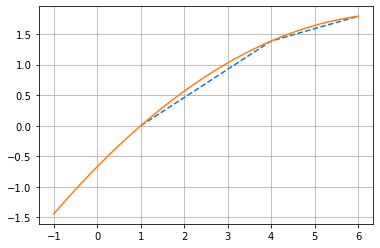

In [23]:
import numpy as np
import matplotlib.pyplot as plt

xm = np.array([1,4,6])
ym = np.log(xm)
#xm = np.array([1, 2, 3, 4, 5, 6])
#ym = np.array([-3, 0, -1, 2, 1, 4])
#ym = np.sin(xm)

xplot = np.linspace(-1., 6.0, 100)
yplot = interpolation(xplot, xm, ym)
plt.plot(xm, ym, '--', xplot, yplot, '-')
plt.grid('True')

[Volver a la Tabla de Contenido](#TOC)

#### Funciones de base

Para entender un poco más cómo es que trabaja la interpolación entre cada uno de los puntos, recordemos que dichos polinomios interpolantes de Lagrange deben cumplir con la propiedad del delta de Kronecker. Para visualizar esto, se implementará la descripción propuesta en el dcumento [Interpolación de Lagrange 1D](https://github.com/AppliedMechanics-EAFIT/modelacion_computacional/blob/master/notebooks/02a_interpolacion.ipynb) realizado por los profesores *Juan David Gómez Cataño* y *Nicolás Guarín Zapata* para el curso de Modelación Computacional en el programa de Ingeniería Civil de la Universidad EAFIT. Todo el crédito para ellos.

In [10]:
# llamado a las biblitecas numéricas, de visualización y simbólicas
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import sympy as sym
sym.init_printing()

In [4]:
def lagrange_poly(x, order, i, xi=None): 
    if xi == None:
        xi = sym.symbols('x:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x - xi[j])/(xi[i] - xi[j]) for j in index])

In [5]:
fun = lambda x: x**3 + 4.0*x**2 - 10.0

In [6]:
npts = 200
x_pts = np.linspace(-1, 1, npts)

In [7]:
pts = np.array([-1, 1, 0])
fd = fun(pts)

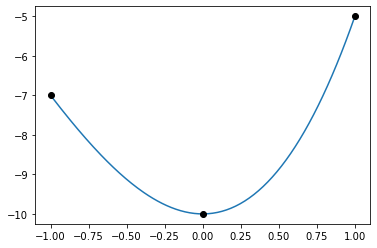

In [8]:
plt.figure()
y_pts = fun(x_pts)
plt.plot(x_pts , y_pts)
plt.plot(pts, fd, 'ko')

In [11]:
x = sym.symbols('x')                                       
pol = []                                                
pol.append(sym.simplify(lagrange_poly(x, 2, 0, [-1,1,0])))  
pol.append(sym.simplify(lagrange_poly(x, 2, 1, [-1,1,0])))
pol.append(sym.simplify(lagrange_poly(x, 2, 2, [-1,1,0])))
pol

In [17]:
plt.figure()
print(npts)
for k in range(3):
    
    for i in range(npts):
        yy[i] = pol[k].subs([(x, x_pts[i])])
        print(yy[i])
    plt.plot(x_pts, yy)

200


NameError: name 'yy' is not defined

<Figure size 432x288 with 0 Axes>

[Volver a la Tabla de Contenido](#TOC)

#### Dificultades de los polinomios de Lagrange

Los polinomios de interpolación de Lagrange presentan dificultades cuando se tienen polinomios de orden muy alto, agravado cuando se tienen puntos equidistantes o se presentan saltos (discontinuidades) en la solución.

A esta situación se le conoce como *[fenómeno de Runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)*. Veamos el siguiente ejemplo:

- Dada la ecuación

$$f(x)=\frac{1}{1+25x^2}$$

si se interpola esta función utilizando nodos equidistantes $x_i \in [-1, 1]$ tal que

$$x_i=-1+(i-1)\frac{2}{n} \quad i \in \{1, 2, 3, \ldots, n, n+1\}$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

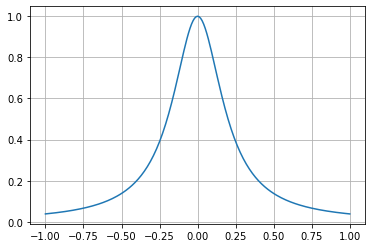

In [19]:
n = 200
x = [-1 + 2 * (i - 1) / n for i in range(1, n + 2)]
y = [1 / (1+ 25 * i **2) for i in x]

plt.plot(x,y)
plt.grid(True)

Ahora vamos a emplear, como ejemplo, una serie de polinomios interpolantes para evaluar su comportamiento, desde orden 1 (2 puntos) hasta de orden 9 (10 puntos).

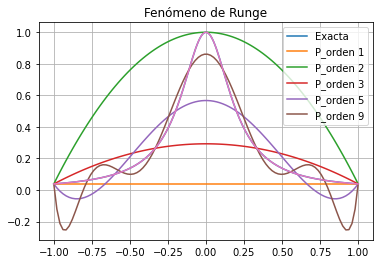

In [25]:
# Polinomios interpolantes de orden 1-9 (2-10 puntos)

data = [2, 3, 4, 6, 10]

#fig = plt.figure(figsize=(16, 6), dpi= 50, facecolor='w', edgecolor='k')
#ax = fig.add_subplot(111)

plt.plot(x, y, '-', label = 'Exacta')
plt.title('Fenómeno de Runge')
xplot = np.linspace(-1., 1.0, 100)


for i in data:
    xRi = np.linspace(-1, 1, i)
    yRi = [1 / (1+ 25 * j **2) for j in xRi]
    
    yploti = interpolation(xplot, xRi, yRi)
    string = "P_orden " + str(i-1)
    plt.plot(xplot, yploti, '-', label = string)

#    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
#    plt.plot(x[idx], f[idx], 'ro')

    plt.legend()

plt.plot(x, y, '-', label = 'Exacta')
plt.title('Fenómeno de Runge')
plt.grid('True')


Se observa que a medida que se aumenta el orden del polinomio, intentando obtener un mejor ajuste, se presentan oscilaciones en los puntos extremos.

***Como actividad complementaria, se invita al estudiante reproducir el fenómeno de Runge que se representa en la gráfica de la Figura 18.14 (p. 526) que se encuentra en el libro de Chapra y Canale, 5a Ed.***

[Volver a la Tabla de Contenido](#TOC)

## Interpolación mediante trazadores

### Introducción

En las secciones anteriores, se usaron polinomios de $n$-ésimo grado para interpolar entre $n+1$ puntos que se tenían como datos, por ejemplo, para $10$ puntos se puede obtener un polinomio exacto de noveno grado. Esta curva podría agrupar todas las curvas al menos hasta, e incluso, la novena derivada. No obstante, hay casos, como el que se acaba de observar, donde estas funciones llevan a resultados erróneos a causa de los errores de redondeo y los puntos lejanos (*fenómeno de Runge*). 

Como alternativa para intentar mitigar esta situación se pueden implementar polinomios de menor grado en subconjuntos de los datos. Tales polinomios conectores se denominan trazadores o [splines](https://en.wikipedia.org/wiki/Spline_(mathematics)).

Supongamos que empleamos curvas de tercer grado para unir dos conjuntos de datos, cada una de esas funciones se pueden construir de tal forma que las conexiones entre ecuaciones cúbicas adyacentes resulten visualmente suaves. Podría parecer que la aproximación de tercer grado de los trazadores sería inferior a la expresión de noveno grado, entonces, por qué un trazador resulta preferible?

El concepto de trazador se originó en la técnica de dibujo que usa una cinta delgada y flexible (llamada spline, en inglés), para dibujar curvas suaves a través de un conjunto de puntos. Se coloca un papel sobre una mesa y alfileres en el papel en la ubicación de los datos. Una curva cúbica suave resulta al entrelazar la cinta entre los alfileres. De aquí que se haya adoptado el nombre de Trazador Cúbico para los polinomios de este tipo.

<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C04_Img04_Spline.PNG?raw=true" width="350" />
</p>

<div style="text-align: right"> Fuente: <a href="http://artemisa.unicauca.edu.co/~cardila/Chapra.pdf">Chapra, S., Canale, R. Métodos Numéricos para ingenieros, 5a Ed. Mc. Graw Hill. 2007</a> </div>


[Volver a la Tabla de Contenido](#TOC)

### Trazadores lineales

La unión más simple entre dos puntos es una línea recta. Los trazadores de primer grado para un grupo de datos ordenados pueden definirse como un conjunto de funciones lineales:

\begin{equation*}
\begin{split}
f(x) & = f(x_0) + m_0(x - x_0), \quad x_0 \le x \le x_1 \\
f(x) & = f(x_1) + m_1(x - x_1), \quad x_1 \le x \le x_2 \\
f(x) & = f(x_2) + m_2(x - x_2), \quad x_2 \le x \le x_3 \\
&\vdots \\
f(x) & = f(x_{n-1}) + m_{n-1}(x - x_{n-1}), \quad x_{n-1} \le x \le x_n
\end{split}
\label{eq:Ec4_21} \tag{4.21}
\end{equation*}

donde $m_i=\frac{f(x_{i+1})-f(x_i)}{(x_{i+1}-x_i)}$ es la pendiente de la línea recta que une los puntos. La principal desventaja de los trazadores de primer grado es que no son suaves. En los puntos donde se encuentran dos trazadores, la pendiente cambia de forma abrupta. La primer derivada de la función es discontinua en esos puntos.

[Volver a la Tabla de Contenido](#TOC)

### Trazadores cuadráticos

Para asegurar que las derivadas $m$-ésimas sean continuas en los nodos, se debe emplear un trazador de un grado de, al menos, $m+1$. El objetivo de los trazadores cuadráticos es obtener un polinomio de segundo grado para cada intervalo entre los datos. De manera general, el polinomio en cada intervalo se representa como:

<a id='Ec4_22'></a>
\begin{equation*}
\begin{split}
f(x_i) = a_ix^2+b_ix+c_i
\end{split}
\label{eq:Ec4_22} \tag{4.22}
\end{equation*}

Para $n+1$ datos ($i=0, 1, 2,\ldots, n$) existen $n$ intervalos y, en consecuencia, $3n$ constantes desconocidas ($a$, $b$ y $c$) por evaluar. Por lo tanto, se requieren $3n$ ecuaciones o condiciones para evaluar las incógnitas. Éstas son:

1. Los valores de la función de polinomios adyacentes deben ser iguales en los nodos interiores. Esta condición se representa como: 

<a id='Ec4_23'></a>
\begin{equation*}
\begin{split}
a_{i−1}x_{i−1}^2+b_{i−1}x_{i−1}+c_{i−1}&=f(x_{i−1}) \\
a_i x_{i−1}^2+b_i x_{i−1}+c_i&=f(x_{i−1})
\end{split}
\label{eq:Ec4_23} \tag{4.23}
\end{equation*}

&emsp; &emsp;para $i=2$ a $n$. Como sólo se emplean nodos interiores, las ecuaciones anteriores proporcionan, cada una, $n–1$ condiciones; en total, $2n–2$ condiciones. 

2. La primera y la última función deben pasar a través de los puntos extremos. Esto agrega dos ecuaciones más:

<a id='Ec4_24'></a>
\begin{equation*}
\begin{split}
a_{1}x_{0}^2+b_{1}x_{0}+c_{1}&=f(x_{0}) \\
a_n x_{n}^2+b_n x_{n}+c_n&=f(x_{n})
\end{split}
\label{eq:Ec4_24} \tag{4.24}
\end{equation*}

&emsp; &emsp;En total se tienen $2n−2+2=2n$ condiciones

3. La primera derivada de la ecuación: $f_i(x)=a_ix^2+b_i x+c$ es: $f'(x_𝑖)=2a_ix+b$. De manera general, esta condición se representa como:

<a id='Ec4_25'></a>
\begin{equation*}
\begin{split}
2a_{i−1} x_{i−1}+b_{i−1}=2a_i x_{i−1}+b_i
\end{split}
\label{eq:Ec4_25} \tag{4.25}
\end{equation*}

&emsp; &emsp;para $i = 2an$. Esto proporciona otras $n–1$ condiciones, llegando a un total de $2n+n−1=3n−1$. Como se tienen $3n$ incógnitas, falta una condición más.

4. Suponga que en el primer punto la segunda derivada es cero. Esto es: $f''_𝑖(x)=2a_i$, que se puede expresar matemáticamente como: 

<a id='Ec4_26'></a>
\begin{equation*}
\begin{split}
a_1=0
\end{split}
\label{eq:Ec4_26} \tag{4.26}
\end{equation*}

<p float="center">
  <img src="https://github.com/carlosalvarezh/Analisis_Numerico/blob/master/images/C04_Img05_Spline2.PNG?raw=true" width="350" />
</p>

<div style="text-align: right"> Fuente: <a href="http://artemisa.unicauca.edu.co/~cardila/Chapra.pdf">Chapra, S., Canale, R. Métodos Numéricos para ingenieros, 5a Ed. Mc. Graw Hill. 2007</a> </div>

[Volver a la Tabla de Contenido](#TOC)

### Trazadores cúbicos

El objetivo es obtener polinomios de tercer grado para cada intervalo entre los nodos:

<a id='Ec4_27'></a>
\begin{equation*}
\begin{split}
f_i(x)=a_i x^3+b_i x^2+c_i x+d_i
\end{split}
\label{eq:Ec4_27} \tag{4.27}
\end{equation*}


Así para los $n+1$ datos ($i=0,1,2,\ldots,n$) existen $n$ intervalos y, por lo tanto, se requerirán de $4n$ condiciones para evaluar las incógnitas. Estas son:

1. Los valores de la función deben ser iguales en los nodos interiores: $2n−2$ condiciones.

2. La primera y la última función deben pasar a través de los puntos extremos: $2$ condiciones.

3. Las primeras derivadas en los nodos interiores deben ser iguales: $n−1$ condiciones.

4. Las segundas derivadas en los nodos interiores deben ser iguales: $n−1$.

5. Las segundas derivadas en los nodos extremos son cero: $2$ condiciones.

Suponga que se tienen $n+1$ puntos, $P_k(x_k,y_k)$, donde los $y_k=f(x_k)$, $k=0m,1,2,\ldots,n$, en los cuales se requiere interpolar una función $f$. Las abcisas, $x_k$, no se requiere que sean equidistantes, pero sí estén ordenadas, es decir: $x_0<x_1<x_2<\ldots<x_n$. 

Se definirá una función $s(x)$ cúbica a trazos en $[x_0, x_n]$, construida a partir de una serie de polinómios c´bicos $q_0(x), q_1(x), q_2(x), \ldots, q_{n-1}(x)$ tales que $s(x)=q_k(x)$ en $[x_k,x_{k+1}]$, para $k=0, 1, 2, \ldots, n-1$.

para que $s(x)$ interpole en los puntos $P_0, P_1, P_2, \ldots, P_n$, los polinomios $q_k(x)$ deben cumplir:

<a id='Ec4_28'></a>
\begin{equation*}
\begin{split}
q_k(x_k)&=y_k \\
q_k(x_{k+1})&=y_{k+1} \quad k=0,1,2 \ldots, n-1
\end{split}
\label{eq:Ec4_28} \tag{4.28}
\end{equation*}

De la ecuación [(4.28)](#Ec4_28) se obtienen $2n$ condiciones. También, los polinomios $q_k(x)$ del interpolador cúbico $s(x)$ deben tener la misma pendiente y concavidad, es decir

<a id='Ec4_29'></a>
\begin{equation*}
\begin{split}
q'_{k-1}(x_k)&=q'_k(x_k) \\
q''_{k-1}(x_{k})&=q''_{k}(x_k) \quad k=1,2 \ldots, n-1
\end{split}
\label{eq:Ec4_29} \tag{4.29}
\end{equation*}

de la ecuación [(4.29)](#Ec4_29) se obtienen otras $2(n-1)$ condiciones a ser satisfechas. Las ecuaciones [(4.28)](#Ec4_28) y [(4.29)](#Ec4_29) son condiciones de continuidad mediante la primera y segunda derivada.

Si $s(x)$ es cúbica a trozos en el intervalo $[x_0, x_n]$, su derivada segunda $s''(x)$ es lineal en el mismo intervalo e interpola en los puntos $(x_k, s''(x_k))$ y $(x_{k+1}, s''(x_{k+1}))$ en $[x_k, x_{k+1}]$. Por tanto, $q_k(x)$ es un polinomio de grado uno que interpola en los puntos $(x_k, s''(x_k))$ y $(x_{k+1}, s''(x_{k+1}))$

\begin{equation*}
\begin{split}
q''_k(x)=s''(x_k) \frac{x-x_{k+1}}{x_k-x_{k+1}}+s''(x_{k+1}) \frac{x-x_{k}}{x_{k+1}-x_{k}}, \quad k=0,1,2,\ldots,n-1
\end{split}
\end{equation*}

sean,

\begin{equation*}
\begin{split}
h_k&=x_{k+1}-x_k, \quad k=0,1,2,\ldots,n-1 \\
\sigma_k&=s''(x_k), \quad k=0,1,2,\ldots,n
\end{split}
\end{equation*}

reemplazando,

<a id='Ec4_30'></a>
\begin{equation*}
\begin{split}
q''_k(x)=\frac{\sigma_k}{h_k}(x_{k+1}-x)+\frac{\sigma_{k+1}}{h_k}(x-x_k), \quad k=0,1,2,\ldots,n
\end{split}
\label{eq:Ec4_30} \tag{4.30}
\end{equation*}

donde $h_k$ y $\sigma_k$ son constantes, con $\sigma_k$ aún por determinar. Para ello, integrando dos veces se tiene

<a id='Ec4_31'></a>
\begin{equation*}
\begin{split}
q_k(x)=\frac{\sigma_k}{h_k}\frac{(x_{k+1}-x)^3}{6}+\frac{\sigma_{k+1}}{h_k}\frac{(x-x_k)}{6}+C_k +D_kx
\end{split}
\label{eq:Ec4_31} \tag{4.31}
\end{equation*}

El término lineal $C_k+D_kx$, se puede reescribir como:

\begin{equation*}
\begin{split}
C_k+D_kx=A_k(x-x_k)+B_k(x_{k+1}-x)
\end{split}
\end{equation*}

donde $A_k$ y $B_k$ son constantes arbitrarias. La ecuación [(4.31)](#Ec4_31) queda

<a id='Ec4_32'></a>
\begin{equation*}
\begin{split}
q_k(x)=\frac{\sigma_k}{h_k}\frac{(x_{k+1}-x)^3}{6}+\frac{\sigma_{k+1}}{h_k}\frac{(x-x_k)}{6}+A_k(x-x_k)+B_k(x_{k+1}-x)
\end{split}
\label{eq:Ec4_32} \tag{4.32}
\end{equation*}

Ahora aplicando las condiciones dadas en las ecuaciones [(4.28)](#Ec4_28) a esta ecuación,

<a id='Ec4_33'></a>
\begin{equation*}
\begin{split}
y_k&=\frac{\sigma_k}{h_k}\frac{h_k^3}{6}+\frac{\sigma_{k+1}}{h_k}\times 0+A_k \times 0 + B_kh_k=\frac{\sigma_k}{6}h_k^2+B_kh_k \\
y_{k+1}&=\frac{\sigma_{k+1}}{h_k}h_k^3+A_kh_k=\frac{\sigma_{k+1}}{6}h_k^2+A_kh_k 
\end{split}
\label{eq:Ec4_33} \tag{4.33}
\end{equation*}

De estas dos ecuaciones con dos incógnitas, se despejan $A_k$ y $B_k$, y se sustituyen en la ecuación [(4.32)](#Ec4_32), resultando:

<a id='Ec4_34'></a>
\begin{equation*}
\begin{split}
q_k(x)&=\frac{\sigma_k}{6} \left[ \frac{(x_{k+1}-x)^3}{h_k}-h_k(x_{k+1}-x) \right] \\
&+\frac{\sigma_{k+1}}{6} \left[ \frac{(x-x_k)^3}{h_k}-h_k(x-x_k) \right] \\
&+y_k \left[ \frac{(x_{k+1}-x)}{h_k} \right] +y_{k+1} \left[ \frac{(x-x_k)}{h_k} \right], \quad k=0,1,2,\ldots,n-1
\end{split}
\label{eq:Ec4_34} \tag{4.34}
\end{equation*}

Que corresponde a la ecuación para el spline $q_k(x)$. Falta conocer los valores $\sigma_k$, con $k=0,1,2,\ldots, n$, que proporcionan otras $n+1$ incógnitas. Para esto, empleamos las condiciones dadas en la ecuación [(4.29)](#Ec4_29) y derivando la ecuación [(4.34)](#Ec4_34), se tiene:

<a id='Ec4_35'></a>
\begin{equation*}
\begin{split}
q'_k(x)&=\frac{\sigma_k}{6} \left[ \frac{-3(x_{k+1}-x)^2}{h_k}+h_k \right]+\frac{\sigma_{k+1}}{6} \left[ \frac{3(x_k-x)^2}{h_k}-h_k \right]+\frac{y_{k+1}-y_k}{h_k}
\end{split}
\label{eq:Ec4_35} \tag{4.35}
\end{equation*}

entonces,

<a id='Ec4_36'></a>
\begin{equation*}
\begin{split}
q'_k(x)&=\frac{\sigma_k}{6}(-2h_k)+\frac{\sigma_{k+1}}{6}(-h_k)+\frac{y_{k+1}-y_k}{h_k}
\end{split}
\label{eq:Ec4_36} \tag{4.36}
\end{equation*}

y

<a id='Ec4_37'></a>
\begin{equation*}
\begin{split}
q'_k(x_{k+1})&=\frac{\sigma_k}{6}(h_k)+\frac{\sigma_{k+1}}{6}(2h_k)+\frac{y_{k+1}-y_k}{h_k} 
\end{split}
\label{eq:Ec4_37} \tag{4.37}
\end{equation*}

Reemplazando $k$ por $k-1$ en la ecuación [(4.37)](#Ec4_37) para obtener $q'_{k-1}(x_k)$ e igualando en la ecuación [(4.36)](#Ec4_36) se llega a:

<a id='Ec4_38'></a>
\begin{equation*}
\begin{split}
h_{k-1}\sigma_{k-1}+2(h_{k-1}+h_k)\sigma_k+h_k\sigma_{k+1}=6 \left( \frac{y_{k+1}-y_k}{h_k} - \frac{y_k-y_{k-1}}{h_{k-1}} \right), \quad k=1,2,3,\ldots, n-1
\end{split}
\label{eq:Ec4_38} \tag{4.38}
\end{equation*}

obsérvese que el término entre paréntesis se puede representar como diferenciales $(\Delta y_k)$ o incluso como diferencias divididas de Newton, $f[x_k,x_{k+1}]$ vistas al comienzo del capítulo. 

Hay que tener en cuenta que el índice $k$ varía de $1$ a $n-1$, produciéndose $n-1$ ecuaciones lineales con $n+1$ incógnitas. Esto genera un sistema indeterminado, con infinitas soluciones. Existen varias formas de determinar $\sigma_0$ y $\sigma_n$ de la primera y $n-1$-ésima ecuación, llegándose a un sistema tridiagonal de orden $n-1$ con las variables $\sigma_k$, $k=1, 2, 3, \ldots, n-1$. 

[Volver a la Tabla de Contenido](#TOC)

#### Alternativa I:

Especificando el valor de la segunda derivada, $s''(x)$ en los puntos extremos: $\sigma_0=s''(x_0)$ y $\sigma_n=s''(x_n)$. Si se supone $\sigma_0=0$ y $\sigma_n=0$ se denomina [spline cúbico natural](https://towardsdatascience.com/numerical-interpolation-natural-cubic-spline-52c1157b98ac)

[Volver a la Tabla de Contenido](#TOC)

#### Alternativa II:

Suponer que $s''(x)$ es constante en los extremos, es decir, $\sigma_0=\sigma_1$ y $\sigma_n=\sigma_{n-1}$

[Volver a la Tabla de Contenido](#TOC)

#### Alternativa III:

Suponer que $s''(x)$ es lineal cerca de los extremos, es decir, 

$$\sigma_0=\frac{1}{h_1}((h_0+h_1)\sigma_1 - h_0\sigma_2)$$

y

$$\sigma_n=\frac{1}{h_{n-2}}((h_{n-2}-h_{n-1})\sigma_{n-2}+ (h_{n-2}+h_{n-1})\sigma_{n-1})$$


[Volver a la Tabla de Contenido](#TOC)

#### Alternativa IV:

Especificar el valor de $s'(x)$ en los puntos extremos:

$$\sigma_0=\frac{3}{h_0}[\Delta y_0-s'(x_0)]-\frac{1}{2}\sigma_1$$

y 

$$\sigma_n=\frac{3}{h_{n-1}}[s'(x_n)-\Delta y_{n-1}]-\frac{1}{2}\sigma_{n-1}$$

[Volver a la Tabla de Contenido](#TOC)

### Ejemplo aplicación 

Dado el siguiente conjunto de datos:

|x|f(x)|
|:--:|:--:|
|3.0|2.5|
|4.5|1.0|
|7.0|2.5|
|9.0|0.5|

Evalúe el valor en $x=5.0$ empleando trazadores cuadráticos y cúbicos



[Volver a la Tabla de Contenido](#TOC)

#### Trazadores cuadráticos


De la tabla se tienen cuatro puntos y $n=3$ intervalos, por lo que se deben determinar $3n=3\times3=9$ incógnitas.

1. De las ecuaciones [(4.23)](#Ec4_23) se determinan $2\times3-2=4$ condiciones así,

\begin{equation*}
\begin{split}
4.5^{2}a_{1}+4.5b_{1}+c_{1}&=1.0 \\
4.5^{2}a_{2}+4.5b_{2}+c_{2}&=1.0 \\
7.0^{2}a_{2}+7.0b_{2}+c_{2}&=2.5 \\
7.0^{2}a_{3}+7.0b_{3}+c_{3}&=2.5
\end{split}
\end{equation*}

2. La primera y última función pasan por los puntos extremos, agregando 2 ecuaciones más, ecuación [(4.24)](#Ec4_24):

\begin{equation*}
\begin{split}
3.0^2a_{1}+3.0b_{1}+c_{1}&=2.5 \\
9.0^2a_{3}+9.0b_{3}+c_{3}&=0.5 
\end{split}
\end{equation*}

3. La continuidad de las derivadas crean adicionalmente $3-1=2$ condiciones, ecuación [(4.25)](#Ec4_25):

\begin{equation*}
\begin{split}
9.0a_{1}+b_{1}=9.0a_{2}+b_{2} \\
14.0a_{2}+b_{2}=14.0a_{3}+b_{3} 
\end{split}
\end{equation*}

4. De la ecuación [(4.26)](#Ec4_26) se obtiene la ecuación faltante, es decir,

\begin{equation*}
\begin{split}
a_{1}=0
\end{split}
\end{equation*}

Esta última ecuación especifica de forma exacta el valor de una de las $9$ condiciones requridas, por lo que el problema se reduce a encontrar las restantes $8$ ecuaciones. Estas condiciones se expresan de forma matricial de la siguiente manera:

\begin{align*}
\left[\begin{array}{cccc}
  4.5 & 1 & 0     & 0   & 0 & 0 & 0 & 0 \\
  0   & 0 & 20.25 & 4.5 & 1 & 0 & 0 & 0 \\
  0   & 0 & 49    & 7   & 1 & 0 & 0 & 0 \\
  0   & 0 & 0     & 0   & 0 & 49 & 7 & 1 \\
  3   & 1 & 0     & 0   & 0 & 0  & 0 & 0 \\
  0   & 0 & 0     & 0   & 0 & 81 & 9 & 1 \\
  1   & 0 & -9    & -1  & 0 & 0 & 0 & 0 \\
  0   & 0 & 14    & 1   & 0 & -14 & -1 & 0 \\
\end{array}\right]
\begin{Bmatrix}
  b_{1}  \\
  c_{1}  \\
  a_{2}  \\
  b_{2}  \\
  c_{2}  \\
  a_{3}  \\
  b_{3}  \\
  c_{3}  \\
\end{Bmatrix}
= \begin{Bmatrix}
  1.0  \\
  1.0  \\
  2.5  \\
  2.5  \\
  2.5  \\
  0.5  \\
  0.0  \\
  0.0
\end{Bmatrix}
\end{align*}

Empleando una de las técnicas de resolución de sistemas de ecuaciones lineales vistas en el capítulo anterior, se llega a las respuetas:

\begin{array}{crl}
a_1&=0.0, &b_1&=-1, &c_1&=5.5 \\
a_2&=0.64, &b_2&=-6.76, &c_2&=18.46 \\
a_3&=-1.6, &b_3&=24.6, &c_3&=-91.3
\end{array}

Sustituyendo estos valores en las ecuaciones cuadráticas originales,

\begin{array}{crl}
f_1(x)=-x+5.5, &3.0\le x \le 4.5 \\
f_2(x)=0.64x^2-6.76x+18.46, &4.5 \le x \le 7.0 \\
f_3(x)=-1.6x^2+24.6x-91.3, &7.0\le x \le 9.0 \\
\end{array}

Por último, se emplea la ecuación $f_2$, para predecir el valor en $x=5$, que es $f_2(5)=0.66$


[Volver a la Tabla de Contenido](#TOC)

#### Trazadores cúbicos

[Volver a la Tabla de Contenido](#TOC)

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()